## LSTM Network for Regression

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

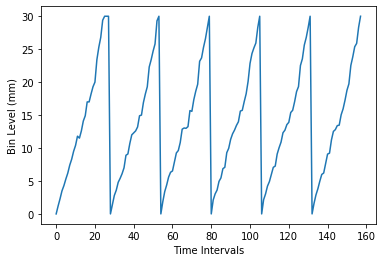

In [2]:
dataset = pandas.read_csv('fill_level.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.xlabel('Time Intervals')
plt.ylabel('Bin Level (cm)')
plt.savefig('data.png', dpi=300)
plt.show()

In [3]:
# load the dataset
dataframe = pandas.read_csv('fill_level.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [4]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

105 53


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# batch_size = 1
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

W1109 20:39:59.443886 4420484544 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:64: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1109 20:39:59.472486 4420484544 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:497: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1109 20:39:59.475492 4420484544 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3636: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1109 20:39:59.764113 4420484544 deprecation.py:506] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:1247: calling reduce_sum_v1 (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
kee

Epoch 1/200
 - 1s - loss: 0.2127
Epoch 2/200
 - 0s - loss: 0.1227
Epoch 3/200
 - 0s - loss: 0.0737
Epoch 4/200
 - 0s - loss: 0.0551
Epoch 5/200
 - 1s - loss: 0.0493
Epoch 6/200
 - 1s - loss: 0.0464
Epoch 7/200
 - 0s - loss: 0.0445
Epoch 8/200
 - 1s - loss: 0.0426
Epoch 9/200
 - 1s - loss: 0.0407
Epoch 10/200
 - 1s - loss: 0.0392
Epoch 11/200
 - 1s - loss: 0.0379
Epoch 12/200
 - 0s - loss: 0.0363
Epoch 13/200
 - 1s - loss: 0.0348
Epoch 14/200
 - 0s - loss: 0.0338
Epoch 15/200
 - 1s - loss: 0.0329
Epoch 16/200
 - 1s - loss: 0.0318
Epoch 17/200
 - 1s - loss: 0.0311
Epoch 18/200
 - 1s - loss: 0.0307
Epoch 19/200
 - 1s - loss: 0.0301
Epoch 20/200
 - 1s - loss: 0.0296
Epoch 21/200
 - 0s - loss: 0.0295
Epoch 22/200
 - 0s - loss: 0.0291
Epoch 23/200
 - 0s - loss: 0.0288
Epoch 24/200
 - 0s - loss: 0.0287
Epoch 25/200
 - 0s - loss: 0.0288
Epoch 26/200
 - 0s - loss: 0.0282
Epoch 27/200
 - 0s - loss: 0.0290
Epoch 28/200
 - 0s - loss: 0.0284
Epoch 29/200
 - 0s - loss: 0.0280
Epoch 30/200
 - 0s - lo

In [10]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# make predictions using first model
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print('\n')
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
print('\n')
trainScore = r2_score(trainY[0], trainPredict[:,0])
print('Train Score: %.2f R2' % (trainScore))
testScore = r2_score(testY[0], testPredict[:,0])
print('Test Score: %.2f R2' % (testScore))

Train Score: 4.71 RMSE
Test Score: 5.28 RMSE


Train Score: 2.07 MAE
Test Score: 2.18 MAE


Train Score: 0.69 R2
Test Score: 0.58 R2


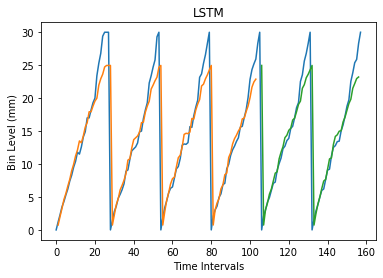

In [11]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Time Intervals')
plt.ylabel('Bin Level (cm)')
plt.title('LSTM')
plt.savefig('LSTM_model_1.png', dpi=300)
plt.show()

In [13]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
# create and fit the second LSTM network
model2 = Sequential()
model2.add(LSTM(5, input_shape=(1, look_back)))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')

# batch_size = 2
model2.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 1s - loss: 0.2119
Epoch 2/200
 - 0s - loss: 0.1432
Epoch 3/200
 - 0s - loss: 0.0972
Epoch 4/200
 - 0s - loss: 0.0696
Epoch 5/200
 - 0s - loss: 0.0560
Epoch 6/200
 - 0s - loss: 0.0497
Epoch 7/200
 - 0s - loss: 0.0470
Epoch 8/200
 - 0s - loss: 0.0455
Epoch 9/200
 - 0s - loss: 0.0441
Epoch 10/200
 - 0s - loss: 0.0428
Epoch 11/200
 - 0s - loss: 0.0413
Epoch 12/200
 - 0s - loss: 0.0400
Epoch 13/200
 - 0s - loss: 0.0389
Epoch 14/200
 - 0s - loss: 0.0380
Epoch 15/200
 - 0s - loss: 0.0366
Epoch 16/200
 - 0s - loss: 0.0359
Epoch 17/200
 - 0s - loss: 0.0348
Epoch 18/200
 - 0s - loss: 0.0339
Epoch 19/200
 - 0s - loss: 0.0331
Epoch 20/200
 - 0s - loss: 0.0325
Epoch 21/200
 - 0s - loss: 0.0319
Epoch 22/200
 - 0s - loss: 0.0312
Epoch 23/200
 - 0s - loss: 0.0306
Epoch 24/200
 - 0s - loss: 0.0305
Epoch 25/200
 - 0s - loss: 0.0301
Epoch 26/200
 - 0s - loss: 0.0296
Epoch 27/200
 - 0s - loss: 0.0295
Epoch 28/200
 - 0s - loss: 0.0292
Epoch 29/200
 - 0s - loss: 0.0289
Epoch 30/200
 - 0s - lo

In [15]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# make predictions using second model
trainPredict = model2.predict(trainX)
testPredict = model2.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print('\n')
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
print('\n')
trainScore = r2_score(trainY[0], trainPredict[:,0])
print('Train Score: %.2f R2' % (trainScore))
testScore = r2_score(testY[0], testPredict[:,0])
print('Test Score: %.2f R2' % (testScore))

Train Score: 4.77 RMSE
Test Score: 5.36 RMSE


Train Score: 2.11 MAE
Test Score: 2.24 MAE


Train Score: 0.68 R2
Test Score: 0.57 R2


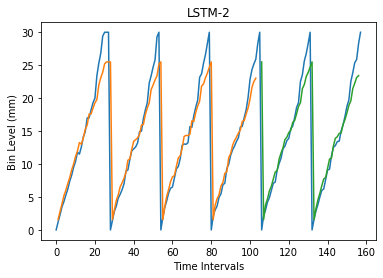

In [16]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Time Intervals')
plt.ylabel('Bin Level (cm)')
plt.title('LSTM-2')
plt.savefig('LSTM_model_2.png', dpi=300)
plt.show()

## LSTM for regression using window method

In [17]:
# load the dataset
dataframe = pandas.read_csv('fill_level.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [18]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
 - 2s - loss: 0.1766
Epoch 2/200
 - 0s - loss: 0.0820
Epoch 3/200
 - 0s - loss: 0.0514
Epoch 4/200
 - 0s - loss: 0.0469
Epoch 5/200
 - 1s - loss: 0.0448
Epoch 6/200
 - 1s - loss: 0.0432
Epoch 7/200
 - 1s - loss: 0.0422
Epoch 8/200
 - 1s - loss: 0.0411
Epoch 9/200
 - 0s - loss: 0.0396
Epoch 10/200
 - 0s - loss: 0.0387
Epoch 11/200
 - 0s - loss: 0.0378
Epoch 12/200
 - 1s - loss: 0.0371
Epoch 13/200
 - 0s - loss: 0.0364
Epoch 14/200
 - 1s - loss: 0.0359
Epoch 15/200
 - 0s - loss: 0.0352
Epoch 16/200
 - 1s - loss: 0.0344
Epoch 17/200
 - 1s - loss: 0.0345
Epoch 18/200
 - 1s - loss: 0.0336
Epoch 19/200
 - 1s - loss: 0.0336
Epoch 20/200
 - 1s - loss: 0.0328
Epoch 21/200
 - 0s - loss: 0.0328
Epoch 22/200
 - 1s - loss: 0.0322
Epoch 23/200
 - 0s - loss: 0.0319
Epoch 24/200
 - 0s - loss: 0.0319
Epoch 25/200
 - 0s - loss: 0.0314
Epoch 26/200
 - 0s - loss: 0.0309
Epoch 27/200
 - 0s - loss: 0.0308
Epoch 28/200
 - 0s - loss: 0.0304
Epoch 29/200
 - 0s - loss: 0.0302
Epoch 30/200
 - 0s - lo

In [19]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print('\n')
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
print('\n')
trainScore = r2_score(trainY[0], trainPredict[:,0])
print('Train Score: %.2f R2' % (trainScore))
testScore = r2_score(testY[0], testPredict[:,0])
print('Test Score: %.2f R2' % (testScore))

Train Score: 4.45 RMSE
Test Score: 3.76 RMSE


Train Score: 1.96 MAE
Test Score: 1.63 MAE


Train Score: 0.72 R2
Test Score: 0.78 R2


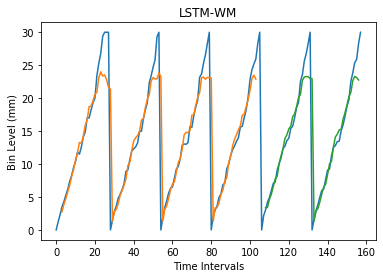

In [20]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Time Intervals')
plt.ylabel('Bin Level (cm)')
plt.title('LSTM-WM')
plt.savefig('window_method.png', dpi=300)
plt.show()

## LSTM for Regression with Time Steps

In [21]:
# load the dataset
dataframe = pandas.read_csv('fill_level.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [22]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=1, verbose=2)

Epoch 1/200
 - 2s - loss: 0.1451
Epoch 2/200
 - 1s - loss: 0.0641
Epoch 3/200
 - 1s - loss: 0.0490
Epoch 4/200
 - 1s - loss: 0.0472
Epoch 5/200
 - 1s - loss: 0.0448
Epoch 6/200
 - 1s - loss: 0.0436
Epoch 7/200
 - 1s - loss: 0.0423
Epoch 8/200
 - 0s - loss: 0.0406
Epoch 9/200
 - 0s - loss: 0.0400
Epoch 10/200
 - 1s - loss: 0.0390
Epoch 11/200
 - 1s - loss: 0.0392
Epoch 12/200
 - 1s - loss: 0.0381
Epoch 13/200
 - 1s - loss: 0.0379
Epoch 14/200
 - 1s - loss: 0.0377
Epoch 15/200
 - 1s - loss: 0.0375
Epoch 16/200
 - 1s - loss: 0.0368
Epoch 17/200
 - 1s - loss: 0.0368
Epoch 18/200
 - 1s - loss: 0.0362
Epoch 19/200
 - 1s - loss: 0.0367
Epoch 20/200
 - 1s - loss: 0.0364
Epoch 21/200
 - 1s - loss: 0.0363
Epoch 22/200
 - 1s - loss: 0.0364
Epoch 23/200
 - 0s - loss: 0.0358
Epoch 24/200
 - 0s - loss: 0.0356
Epoch 25/200
 - 0s - loss: 0.0353
Epoch 26/200
 - 1s - loss: 0.0355
Epoch 27/200
 - 1s - loss: 0.0347
Epoch 28/200
 - 1s - loss: 0.0348
Epoch 29/200
 - 0s - loss: 0.0356
Epoch 30/200
 - 1s - lo

In [23]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print('\n')
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
print('\n')
trainScore = r2_score(trainY[0], trainPredict[:,0])
print('Train Score: %.2f R2' % (trainScore))
testScore = r2_score(testY[0], testPredict[:,0])
print('Test Score: %.2f R2' % (testScore))

Train Score: 4.66 RMSE
Test Score: 3.97 RMSE


Train Score: 2.21 MAE
Test Score: 1.89 MAE


Train Score: 0.69 R2
Test Score: 0.75 R2


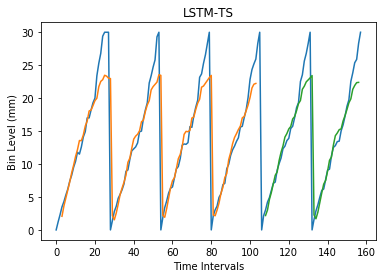

In [24]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Time Intervals')
plt.ylabel('Bin Level (cm)')
plt.title('LSTM-TS')
plt.savefig('time_steps.png', dpi=300)
plt.show()

## LSTM with Memory Between Batches

In [25]:
# load the dataset
dataframe = pandas.read_csv('fill_level.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [26]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(200):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()


Epoch 1/1
 - 2s - loss: 0.2740
Epoch 1/1
 - 0s - loss: 0.1060
Epoch 1/1
 - 0s - loss: 0.0684
Epoch 1/1
 - 0s - loss: 0.0641
Epoch 1/1
 - 0s - loss: 0.0606
Epoch 1/1
 - 0s - loss: 0.0576
Epoch 1/1
 - 0s - loss: 0.0551
Epoch 1/1
 - 0s - loss: 0.0531
Epoch 1/1
 - 1s - loss: 0.0516
Epoch 1/1
 - 0s - loss: 0.0503
Epoch 1/1
 - 0s - loss: 0.0493
Epoch 1/1
 - 0s - loss: 0.0483
Epoch 1/1
 - 0s - loss: 0.0474
Epoch 1/1
 - 0s - loss: 0.0466
Epoch 1/1
 - 0s - loss: 0.0458
Epoch 1/1
 - 0s - loss: 0.0450
Epoch 1/1
 - 0s - loss: 0.0443
Epoch 1/1
 - 0s - loss: 0.0435
Epoch 1/1
 - 0s - loss: 0.0428
Epoch 1/1
 - 0s - loss: 0.0420
Epoch 1/1
 - 0s - loss: 0.0413
Epoch 1/1
 - 1s - loss: 0.0407
Epoch 1/1
 - 0s - loss: 0.0400
Epoch 1/1
 - 0s - loss: 0.0394
Epoch 1/1
 - 0s - loss: 0.0388
Epoch 1/1
 - 0s - loss: 0.0382
Epoch 1/1
 - 0s - loss: 0.0376
Epoch 1/1
 - 0s - loss: 0.0371
Epoch 1/1
 - 0s - loss: 0.0365
Epoch 1/1
 - 0s - loss: 0.0360
Epoch 1/1
 - 0s - loss: 0.0356
Epoch 1/1
 - 0s - loss: 0.0352
Epoch 1/

In [27]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print('\n')
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
print('\n')
trainScore = r2_score(trainY[0], trainPredict[:,0])
print('Train Score: %.2f R2' % (trainScore))
testScore = r2_score(testY[0], testPredict[:,0])
print('Test Score: %.2f R2' % (testScore))

Train Score: 3.91 RMSE
Test Score: 2.93 RMSE


Train Score: 1.67 MAE
Test Score: 1.17 MAE


Train Score: 0.78 R2
Test Score: 0.86 R2


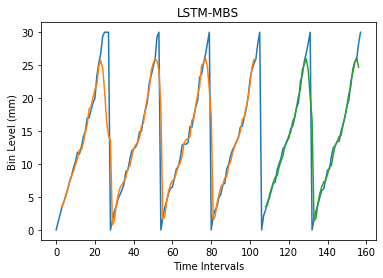

In [28]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Time Intervals')
plt.ylabel('Bin Level (cm)')
plt.title('LSTM-MBS')
plt.savefig('memory_between_batches.png', dpi=300)
plt.show()

## Stacked LSTMs with Memory Between Batches

In [29]:
# load the dataset
dataframe = pandas.read_csv('fill_level.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [30]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(200):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

Epoch 1/1
 - 3s - loss: 0.0803
Epoch 1/1
 - 1s - loss: 0.0589
Epoch 1/1
 - 1s - loss: 0.0581
Epoch 1/1
 - 1s - loss: 0.0573
Epoch 1/1
 - 1s - loss: 0.0567
Epoch 1/1
 - 1s - loss: 0.0560
Epoch 1/1
 - 1s - loss: 0.0555
Epoch 1/1
 - 1s - loss: 0.0550
Epoch 1/1
 - 1s - loss: 0.0546
Epoch 1/1
 - 1s - loss: 0.0543
Epoch 1/1
 - 1s - loss: 0.0541
Epoch 1/1
 - 1s - loss: 0.0538
Epoch 1/1
 - 1s - loss: 0.0536
Epoch 1/1
 - 1s - loss: 0.0535
Epoch 1/1
 - 1s - loss: 0.0533
Epoch 1/1
 - 1s - loss: 0.0531
Epoch 1/1
 - 1s - loss: 0.0530
Epoch 1/1
 - 1s - loss: 0.0528
Epoch 1/1
 - 1s - loss: 0.0527
Epoch 1/1
 - 1s - loss: 0.0524
Epoch 1/1
 - 1s - loss: 0.0520
Epoch 1/1
 - 1s - loss: 0.0514
Epoch 1/1
 - 1s - loss: 0.0509
Epoch 1/1
 - 1s - loss: 0.0504
Epoch 1/1
 - 1s - loss: 0.0501
Epoch 1/1
 - 1s - loss: 0.0498
Epoch 1/1
 - 1s - loss: 0.0494
Epoch 1/1
 - 1s - loss: 0.0491
Epoch 1/1
 - 1s - loss: 0.0489
Epoch 1/1
 - 1s - loss: 0.0486
Epoch 1/1
 - 1s - loss: 0.0483
Epoch 1/1
 - 1s - loss: 0.0480
Epoch 1/

In [31]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
print('\n')
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print('Train Score: %.2f MAE' % (trainScore))
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print('Test Score: %.2f MAE' % (testScore))
print('\n')
trainScore = r2_score(trainY[0], trainPredict[:,0])
print('Train Score: %.2f R2' % (trainScore))
testScore = r2_score(testY[0], testPredict[:,0])
print('Test Score: %.2f R2' % (testScore))

Train Score: 4.00 RMSE
Test Score: 2.95 RMSE


Train Score: 1.86 MAE
Test Score: 1.34 MAE


Train Score: 0.77 R2
Test Score: 0.86 R2


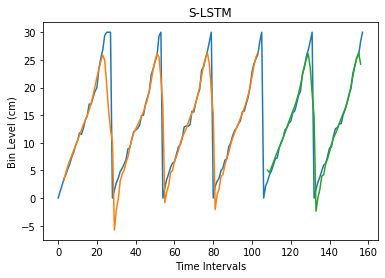

In [33]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.xlabel('Time Intervals')
plt.ylabel('Bin Level (cm)')
plt.title('S-LSTM')
plt.savefig('stacked.png', dpi=300)
plt.show()